In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  
from sklearn import metrics
import os
import math

/Users/admin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/admin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def sigma_each(x):
    std = np.std(x, axis=0 , ddof= 1)
    std = math.pow(std,2)
    std = np.array(std)
    return std

In [4]:
def AI(arr):
    trisum = 0
    result = []
    for i in range(len(arr[0])):
        trisum += arr[0][i][0]
        trisum += arr[0][i][1]
        trisum += arr[0][i][2]
        
        result.append(math.sqrt(max(trisum/3,0)))
    result = np.array(result)
    return result

In [5]:
INPUT_SIGNAL_TYPES = [
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [6]:
def load_X(X_signals_paths):
    X_signals = []
    X_signals_rest = []

    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()

    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
      "UCI HAR Dataset/train/" + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    "UCI HAR Dataset/test/" + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()

    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

y_train_path = "UCI HAR Dataset/train/y_train.txt"
y_test_path = "UCI HAR Dataset/test/y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [7]:
print(y_train)
print(len(y_train))
print("-------------")
print(y_test)

[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
7352
-------------
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]


In [8]:
print(X_test)
print("-------------")
print("-----------------------------------------------------------")
print(X_test[0])
print("-----------------------------------------------------------")
print(X_test[0][0])
print("-----------------------------------------------------------")
print(X_train[0][0][0])
print("-----------------------------------------------------------")
print(len(X_train))
print("-----------------------------------------------------------")

print(len(X_train[0]))
print(len(X_train[0][0]))


[[[ 1.041216   -0.2697959   0.02377977]
  [ 1.041803   -0.280025    0.07629271]
  [ 1.039086   -0.2926631   0.1474754 ]
  ...
  [ 0.9930164  -0.2599865   0.1443951 ]
  [ 0.9932414  -0.2620643   0.1447033 ]
  [ 0.9943906  -0.2641348   0.1454939 ]]

 [[ 0.9991921  -0.2649349   0.1256164 ]
  [ 0.9946787  -0.2532142   0.1256249 ]
  [ 0.9935518  -0.2565887   0.1163814 ]
  ...
  [ 1.001861   -0.2619359   0.1527878 ]
  [ 0.9975208  -0.2713225   0.1398428 ]
  [ 0.9928615  -0.2799715   0.1213135 ]]

 [[ 0.9975931  -0.2639912   0.1507741 ]
  [ 0.9989703  -0.2638194   0.1539427 ]
  [ 0.9970574  -0.2638495   0.1441536 ]
  ...
  [ 0.9918802  -0.2836712   0.132678  ]
  [ 0.9906626  -0.280597    0.1326941 ]
  [ 0.9882446  -0.2822329   0.1321175 ]]

 ...

 [[ 0.8213505  -0.2484623  -0.2216934 ]
  [ 0.7991996  -0.2232599  -0.2045561 ]
  [ 0.8004623  -0.179017   -0.2568719 ]
  ...
  [ 1.46317    -0.5515283  -0.2723974 ]
  [ 1.179223   -0.5472997  -0.06773376]
  [ 0.8504963  -0.4900368   0.1378256 ]]

 [

In [9]:
###import more_itertools as mit
###print(list(mit.windowed(X_train, n=64)))

In [10]:
for i in range (200):
    print(y_train)

[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
[[4]
 [4]
 [4]
 ...
 [1]
 [1

In [23]:
def equation_bi(arr):
    all_std = []
    
    std_i = np.std(arr,axis=0)
#     print(std_i)
    diff_std = std_i**2 - std_i_bar
    diff_std = diff_std / std_i_bar
#     print(diff_std)

    all_std.append(diff_std)
    
    
    all_std = np.array(all_std)
#     print(all_std)
    
    ai = max(np.sum(all_std, axis = 1)/3,0)
    
#     print(ai)
    ai = np.sqrt(ai)
#     print(ai)
    
    return ai

In [12]:
X_train_dict = {} # per labels
X_test_dict = {}
y_train_dict = {}
y_test_dict = {}
labels_count = len(LABELS)

for i in range(labels_count):
    X_train_dict[i] = []

for i in range(len(X_train)):
    for X_i in X_train[i]:
        X_train_dict[y_train[i][0]].append(X_i)

In [25]:
idx = [i for i in range(len(LABELS)) if(LABELS[i]=="SITTING")][0]
rest_dict = X_train_dict[idx]
print(rest_dict[0])


all_std = []
window = []
cnt = 0
H = 10
for X_i in rest_dict:
    
    cnt += 1
    window.append(X_i)
    if(cnt==H):
        std_i = np.std(window,axis=0)
        all_std.append(std_i)
        cnt = 0
        window.clear()

all_std = np.array(all_std)
print(all_std)

C = 0.1
sum_std_i = [0,0,0]
count = [0,0,0]
for elem in all_std:
    for i in range(len(elem)):
        if(elem[i]<=C):
            count[i] += 1
            sum_std_i[i] += elem[i]
    

sum_std_i = np.array(sum_std_i)
count = np.array(count)
std_i_bar = sum_std_i/count

print(std_i_bar)

#std_i_bar = np.sqrt(std_i_bar)
#print(std_i_bar)

std_i_bar_ = [std_i_bar for i in range(3)]
std_i_bar_ = np.array(std_i_bar_)
print(rest_dict)


[0.9068317 0.1398434 0.3950031]
[[0.00722291 0.01441568 0.00683841]
 [0.00610335 0.0050683  0.00754663]
 [0.00590409 0.01565227 0.00768918]
 ...
 [0.00201011 0.00160965 0.00475972]
 [0.0017976  0.00159812 0.00278492]
 [0.00342675 0.00446508 0.00146964]]
[0.00343634 0.00439691 0.00519377]
[[0.9068317  0.1398434  0.3950031 ]
 [0.9093641  0.1457557  0.3911455 ]
 [0.9083683  0.1568323  0.3932516 ]
 ...
 [0.9889435  0.02417508 0.2688828 ]
 [0.9888734  0.02324741 0.2666776 ]
 [0.9888762  0.02184075 0.2651852 ]]


In [14]:
print(std_i_bar)

3.3839366e-05


In [15]:
print(labels_count)

6


In [16]:
print(len(X_train_dict))
print(X_train_dict[0])
print(X_train_dict[0][0])
print(X_train_dict[0][0][0])
print(X_train_dict[0][0][1])

6


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



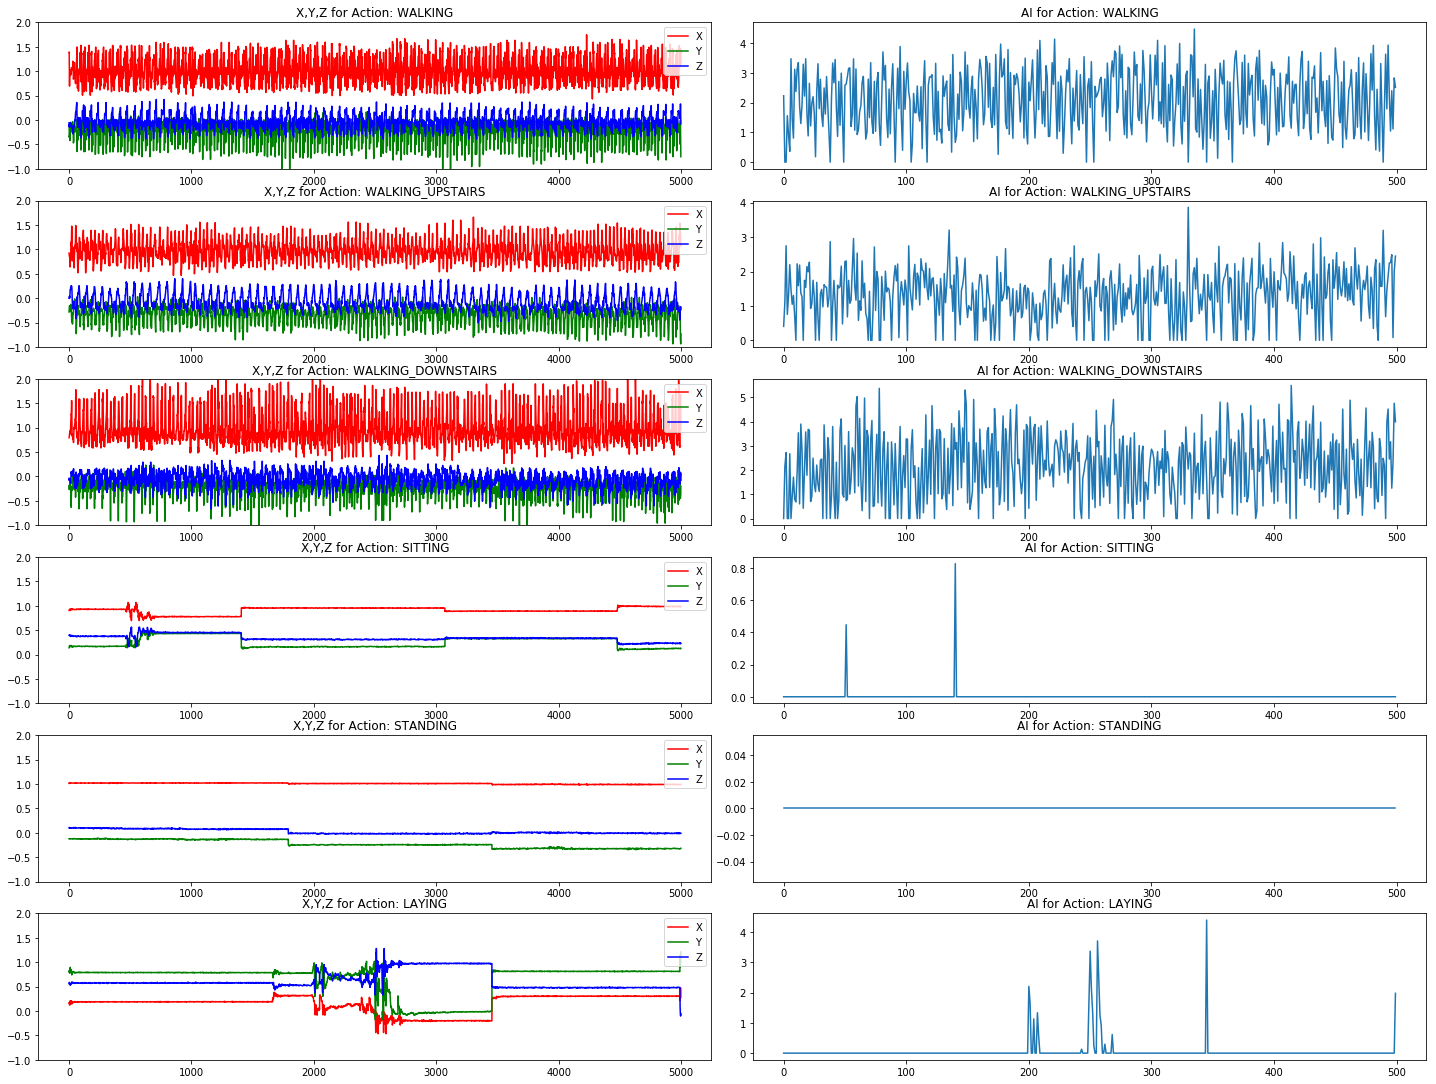

<Figure size 1152x648 with 0 Axes>

In [26]:
fig, axes = plt.subplots(nrows=labels_count, ncols=2, figsize=(20,15))
fig.tight_layout()

X_train_x = []
X_train_y = []
X_train_z = []
X_ai = []

ai_labels = []

count = 0
H = 10

for i in range(labels_count):
    ai_all = []
    
    X_train_dict[i] = np.array(X_train_dict[i])
#     graph_size = int(len(X_train_dict[i])/4)
    graph_size = 5000
    
    for j in range(graph_size):
        X_train_x.append(X_train_dict[i][j][0])
        X_train_y.append(X_train_dict[i][j][1])
        X_train_z.append(X_train_dict[i][j][2])
        X_ai.append([X_train_dict[i][j][0],X_train_dict[i][j][1],X_train_dict[i][j][2]])
            
        count += 1
        if(count==H):
            ai_val = equation_bi(X_ai)
            ai_all.append(ai_val)
            X_ai.clear()
            count = 0
    
#     print(ai_all)
    ai_labels.append(ai_all)
#     print(ai_labels)
    
    ax = axes[i,0]
    ax.plot(X_train_x,'r',label='X')
    ax.plot(X_train_y,'g',label='Y')
    ax.plot(X_train_z,'b',label='Z')
    ax.set_title('X,Y,Z for Action: ' + LABELS[i])
    ax.set_ylim(bottom=-1.0,top=2.0)
    ax.legend(loc='upper right')
        
    ax = axes[i,1]
    ax.plot(ai_all)
    ax.set_title('AI for Action: ' + LABELS[i])
    #ax.set_ylim(bottom=0.0,top=2.0)
    
    X_train_x.clear()
    X_train_y.clear()
    X_train_z.clear()
    
#     print(ai_labels)
    
plt.figure(figsize=(16,9))
fig.savefig('fig3.png', dpi = 300)

plt.show()

In [ ]:
print(ai_labels)

In [ ]:
from scipy import stats

In [ ]:
z = []
fig, axes = plt.subplots(nrows=labels_count, ncols=1, figsize=(20,15))
plt.tight_layout()
cnt = 0
for ai in ai_labels:
#     print(ai)
    z_score = stats.zscore(ai)
    z.append(z_score)
    axes[cnt].boxplot(z_score, vert=False)
    axes[cnt].set_title(LABELS[cnt])
    cnt += 1
    
plt.show()

In [ ]:
for i in range(len(z)):
    z[i] = np.array(z[i])
    z_avg = np.average(z[i])
    print(LABELS[i], ': ', z_avg)

In [ ]:
print(X_train)
print(len(X_train))

In [ ]:
print(len(X_train[0]))
print(len(X_train[0][1]))
print((X_train[0][0][1]))

In [ ]:
X_train = AI(X_train)

In [ ]:
print(X_train[0],X_train[1],X_train[2],X_train[3],X_train[4])
print(X_train[5],X_train[6],X_train[7],X_train[8],X_train[9])
print(X_train[10],X_train[11],X_train[12],X_train[13],X_train[14])
print(X_train[15],X_train[16],X_train[17],X_train[18],X_train[19])
print(X_train[20])
print(len(X_train))

In [ ]:
X_test = equation_bi(X_test)

In [ ]:
print(X_test)
print(len(X_test[0]))

In [ ]:
X_test = AI(X_test)

In [ ]:
print(len(X_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
X_train = X_train.reshape(7352,1,1)
X_test = X_test.reshape(2947,1,1)

In [ ]:
y_train = y_train.reshape(7352,6)
y_test = y_test.reshape(2947,6)

## Model LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTMCell , RNN , LSTM , Embedding, SimpleRNN, Input
from keras.utils import to_categorical

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
yt = y_train
ytest = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
# fit and evaluate a model

verbose, epochs, batch_size = 1, 1000, 64
n_outputs = y_train.shape[1]

cells = [
    LSTMCell(output_dim),
    LSTMCell(output_dim)
]

inputs = Input(shape=(1,1))
model = LSTMCell(100,activation = 'tanh',use_bias = True,unit_forget_bias=True)(inputs)
model = LSTMCell(100,activation = 'tanh',use_bias = True,unit_forget_bias=True)(model)
model = Dense(100 , activation = 'relu')(model)
model = Dense(n_outputs , activation = 'softmax')
#model = Sequential()
#model.add(LSTM(100,unit_forget_bias =1, input_shape=(1,1)))

#model.add(Dropout(0.2))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
earlystopper = EarlyStopping(monitor='val_loss', patience=0, verbose=1)
	# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,callbacks=[earlystopper], verbose=verbose)
	# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)


In [ ]:
label = model.predict(X_test)

In [ ]:
score = accuracy * 100.0
summarize_results(scores)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
print(len(label))
print(label[0])

In [ ]:
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

In [ ]:
print(accuracy * 100)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
print(y_test)

In [ ]:
print(X_test)

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# Input Data

training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
n_steps = 1  # 128 timesteps per series
n_input = 1  # 9 input parameters per timestep


# LSTM Neural Network's internal structure

n_hidden = 32 # Hidden layer num of features
n_classes = 6 # Total classes (should go up, or should go down)


# Training

learning_rate = 0.0025
lambda_loss_amount = 0.0015
training_iters = training_data_count * 100  
batch_size = 1500
display_iter = 30000  # To show test set accuracy during training

print(X_test.shape, y_test.shape,X_train.shape, np.mean(X_test), np.std(X_test))
print(n_steps , n_input)

In [ ]:
def LSTM_RNN(_X, _weights, _biases):
    # Function returns a tensorflow LSTM (RNN) artificial neural network from given parameters.
    # Moreover, two LSTM cells are stacked which adds deepness to the neural network.
    # Note, some code of this notebook is inspired from an slightly different
    # RNN architecture used on another dataset, some of the credits goes to
    # "aymericdamien" under the MIT license.


    # input shape: (batch_size, n_steps, n_input)
    _X = tf.transpose(_X, [1, 0, 2])  # permute n_steps and batch_size
    # Reshape to prepare input to hidden activation
    _X = tf.reshape(_X, [-1, n_input])
    # new shape: (n_steps*batch_size, n_input)

    # ReLU activation, thanks to Yu Zhao for adding this improvement here:
    _X = tf.nn.relu(tf.matmul(_X, _weights['hidden']) + _biases['hidden'])
    # Split data because rnn cell needs a list of inputs for the RNN inner loop
    _X = tf.split(_X, n_steps, 0)
    # new shape: n_steps * (batch_size, n_hidden)

    # Define two stacked LSTM cells (two recurrent layers deep) with tensorflow
    lstm_cell_1 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cell_2 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell_1, lstm_cell_2], state_is_tuple=True)
    # Get LSTM cell output
    outputs, states = tf.contrib.rnn.static_rnn(lstm_cells, _X, dtype=tf.float32)

    # Get last time step's output feature for a "many-to-one" style classifier
    lstm_last_output = outputs[-1]

    # Linear activation
    return tf.matmul(lstm_last_output, _weights['out']) + _biases['out']

def extract_batch_size(_train,step,batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data.

    shape = list(_train.shape)
    shape[0] = batch_size
    batch_s = np.empty(shape)
    
    for i in range(batch_size):
        # Loop index
        index = ((step-1)*batch_size + i) % len(_train)
        batch_s[i] = _train[index]

    return batch_s


def one_hot(y_, n_classes=n_classes):
    # Function to encode neural one-hot output labels from number indexes
    # e.g.:
    # one_hot(y_=[[5], [0], [3]], n_classes=6):
    #     return [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]

    y_ = y_.reshape(len(y_))
    return np.eye(n_classes)[np.array(y_, dtype=np.int32)]  # Returns FLOATS

In [ ]:
# Graph input/output
x = tf.placeholder(tf.float32, [None,n_steps,batch_size])
y = tf.placeholder(tf.float32, [None, n_classes])

# Graph weights
weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes], mean=1.0))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [ ]:
pred = LSTM_RNN(x, weights, biases)

# Loss, optimizer and evaluation
l2 = lambda_loss_amount * sum(
    tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables()
) # L2 loss prevents this overkill neural network to overfit the data
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)) + l2 # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
print(extract_batch_size(X_train))
print(len(extract_batch_size(X_train)))
print(x, ":",extract_batch_size(X_train))

In [ ]:
test_losses = []
test_accuracies = []
train_losses = []
train_accuracies = []

# Launch the graph
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
init = tf.global_variables_initializer()
sess.run(init)

# Perform Training steps with "batch_size" amount of example data at each loop
step = 1
while step * batch_size <= training_iters:
    batch_xs =         extract_batch_size(X_train, step, batch_size)
    batch_ys = one_hot(extract_batch_size(y_train, step, batch_size))

    # Fit training using batch data
    _, loss, acc = sess.run(
        [optimizer, cost, accuracy],
        feed_dict={
            x: batch_xs, 
            y: batch_ys
        }
    )
    train_losses.append(loss)
    train_accuracies.append(acc)
    
    # Evaluate network only at some steps for faster training: 
    if (step*batch_size % display_iter == 0) or (step == 1) or (step * batch_size > training_iters):
        
        # To not spam console, show training accuracy/loss in this "if"
        print("Training iter #" + str(step*batch_size) + \
              ":   Batch Loss = " + "{:.6f}".format(loss) + \
              ", Accuracy = {}".format(acc))
        
        # Evaluation on the test set (no learning made here - just evaluation for diagnosis)
        loss, acc = sess.run(
            [cost, accuracy], 
            feed_dict={
                x: X_test,
                y: one_hot(y_test)
            }
        )
        test_losses.append(loss)
        test_accuracies.append(acc)
        print("PERFORMANCE ON TEST SET: " + \
              "Batch Loss = {}".format(loss) + \
              ", Accuracy = {}".format(acc))

    step += 1

print("Optimization Finished!")

# Accuracy for test data

one_hot_predictions, accuracy, final_loss = sess.run(
    [pred, accuracy, cost],
    feed_dict={
        x: X_test,
        y: one_hot(y_test)
    }
)

test_losses.append(final_loss)
test_accuracies.append(accuracy)

print("FINAL RESULT: " + \
      "Batch Loss = {}".format(final_loss) + \
      ", Accuracy = {}".format(accuracy))

In [ ]:
width = 12
height = 12
plt.figure(figsize=(width, height))

indep_train_axis = np.array(range(batch_size, (len(train_losses)+1)*batch_size, batch_size))
plt.plot(indep_train_axis, np.array(train_losses),     "b--", label="Train losses")
plt.plot(indep_train_axis, np.array(train_accuracies), "g--", label="Train accuracies")

indep_test_axis = np.append(
    np.array(range(batch_size, len(test_losses)*display_iter, display_iter)[:-1]),
    [training_iters]
)
plt.plot(indep_test_axis, np.array(test_losses),     "b-", label="Test losses")
plt.plot(indep_test_axis, np.array(test_accuracies), "g-", label="Test accuracies")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training iteration')

plt.show()

In [ ]:
predictions = one_hot_predictions.argmax(1)

print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
#print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
#print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

#print("")
#print("Confusion matrix (normalised to % of total test data):")
#print(normalised_confusion_matrix)
#print("Note: training and testing data is not equally distributed amongst classes, ")
#print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results:
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix,
    interpolation='nearest',
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## DTW

In [ ]:
import sys
from scipy.stats import mode
from scipy.spatial.distance import squareform
plt.style.use('bmh')
%matplotlib inline

In [ ]:
try:
    from IPython.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False

class KnnDtw(object):
    """K-nearest neighbor classifier using dynamic time warping
    as the distance measure between pairs of time series arrays
    
    Arguments
    ---------
    n_neighbors : int, optional (default = 5)
        Number of neighbors to use by default for KNN
        
    max_warping_window : int, optional (default = infinity)
        Maximum warping window allowed by the DTW dynamic
        programming function
            
    subsample_step : int, optional (default = 1)
        Step size for the timeseries array. By setting subsample_step = 2,
        the timeseries length will be reduced by 50% because every second
        item is skipped. Implemented by x[:, ::subsample_step]
    """
    
    def __init__(self, n_neighbors=5, max_warping_window=10000, subsample_step=1):
        self.n_neighbors = n_neighbors
        self.max_warping_window = max_warping_window
        self.subsample_step = subsample_step
    
    def fit(self, x, l):
        """Fit the model using x as training data and l as class labels
        
        Arguments
        ---------
        x : array of shape [n_samples, n_timepoints]
            Training data set for input into KNN classifer
            
        l : array of shape [n_samples]
            Training labels for input into KNN classifier
        """
        
        self.x = x
        self.l = l
        
    def _dtw_distance(self, ts_a, ts_b, d = lambda x,y: abs(x-y)):
        """Returns the DTW similarity distance between two 2-D
        timeseries numpy arrays.

        Arguments
        ---------
        ts_a, ts_b : array of shape [n_samples, n_timepoints]
            Two arrays containing n_samples of timeseries data
            whose DTW distance between each sample of A and B
            will be compared
        
        d : DistanceMetric object (default = abs(x-y))
            the distance measure used for A_i - B_j in the
            DTW dynamic programming function
        
        Returns
        -------
        DTW distance between A and B
        """

        # Create cost matrix via broadcasting with large int
        ts_a, ts_b = np.array(ts_a), np.array(ts_b)
        M, N = len(ts_a), len(ts_b)
        cost = sys.maxsize * np.ones((M, N))

        # Initialize the first row and column
        cost[0, 0] = d(ts_a[0], ts_b[0])
        for i in range(1, M):
            cost[i, 0] = cost[i-1, 0] + d(ts_a[i], ts_b[0])

        for j in range(1, N):
            cost[0, j] = cost[0, j-1] + d(ts_a[0], ts_b[j])

        # Populate rest of cost matrix within window
        for i in range(1, M):
            for j in range(max(1, i - self.max_warping_window),
                            min(N, i + self.max_warping_window)):
                choices = cost[i - 1, j - 1], cost[i, j-1], cost[i-1, j]
                cost[i, j] = min(choices) + d(ts_a[i], ts_b[j])

        # Return DTW distance given window 
        return cost[-1, -1]
    
    def _dist_matrix(self, x, y):
        """Computes the M x N distance matrix between the training
        dataset and testing dataset (y) using the DTW distance measure
        
        Arguments
        ---------
        x : array of shape [n_samples, n_timepoints]
        
        y : array of shape [n_samples, n_timepoints]
        
        Returns
        -------
        Distance matrix between each item of x and y with
            shape [training_n_samples, testing_n_samples]
        """
        
        # Compute the distance matrix        
        dm_count = 0
        
        # Compute condensed distance matrix (upper triangle) of pairwise dtw distances
        # when x and y are the same array
        if(np.array_equal(x, y)):
            x_s = np.shape(x)
            dm = np.zeros((x_s[0] * (x_s[0] - 1)) // 2, dtype=np.double)
            
            p = ProgressBar(shape(dm)[0])
            
            for i in range(0, x_s[0] - 1):
                for j in range(i + 1, x_s[0]):
                    dm[dm_count] = self._dtw_distance(x[i, ::self.subsample_step],
                                                      y[j, ::self.subsample_step])
                    
                    dm_count += 1
                    p.animate(dm_count)
            
            # Convert to squareform
            dm = squareform(dm)
            return dm
        
        # Compute full distance matrix of dtw distnces between x and y
        else:
            x_s = np.shape(x)
            y_s = np.shape(y)
            dm = np.zeros((x_s[0], y_s[0])) 
            dm_size = x_s[0]*y_s[0]
            
            p = ProgressBar(dm_size)
        
            for i in range(0, x_s[0]):
                for j in range(0, y_s[0]):
                    dm[i, j] = self._dtw_distance(x[i, ::self.subsample_step],
                                                  y[j, ::self.subsample_step])
                    # Update progress bar
                    dm_count += 1
                    p.animate(dm_count)
        
            return dm
        
    def predict(self, x):
        """Predict the class labels or probability estimates for 
        the provided data

        Arguments
        ---------
          x : array of shape [n_samples, n_timepoints]
              Array containing the testing data set to be classified
          
        Returns
        -------
          2 arrays representing:
              (1) the predicted class labels 
              (2) the knn label count probability
        """
        
        dm = self._dist_matrix(x, self.x)

        # Identify the k nearest neighbors
        knn_idx = dm.argsort()[:, :self.n_neighbors]

        # Identify k nearest labels
        knn_labels = self.l[knn_idx]
        
        # Model Label
        mode_data = mode(knn_labels, axis=1)
        mode_label = mode_data[0]
        mode_proba = mode_data[1]/self.n_neighbors

        return mode_label.ravel(), mode_proba.ravel()

class ProgressBar:
    """This progress bar was taken from PYMC
    """
    def __init__(self, iterations):
        self.iterations = iterations
        self.prog_bar = '[]'
        self.fill_char = '*'
        self.width = 40
        self.__update_amount(0)
        if have_ipython:
            self.animate = self.animate_ipython
        else:
            self.animate = self.animate_noipython

    def animate_ipython(self, iter):
        print ('\r', self,)
        sys.stdout.flush()
        self.update_iteration(iter + 1)

    def update_iteration(self, elapsed_iter):
        self.__update_amount((elapsed_iter / float(self.iterations)) * 100.0)
        self.prog_bar += '  %d of %s complete' % (elapsed_iter, self.iterations)

    def __update_amount(self, new_amount):
        percent_done = int(round((new_amount / 100.0) * 100.0))
        all_full = self.width - 2
        num_hashes = int(round((percent_done / 100.0) * all_full))
        self.prog_bar = '[' + self.fill_char * num_hashes + ' ' * (all_full - num_hashes) + ']'
        pct_place = (len(self.prog_bar) // 2) - len(str(percent_done))
        pct_string = '%d%%' % percent_done
        self.prog_bar = self.prog_bar[0:pct_place] + \
            (pct_string + self.prog_bar[pct_place + len(pct_string):])

    def __str__(self):
        return str(self.prog_bar)

In [ ]:
m = KnnDtw(n_neighbors=1, max_warping_window=10)
m.fit(X_train[::10], y_train[::10])
label = m.predict(X_test[::10])

In [ ]:
print (classification_report(label, y_test[::10],target_names=[l for l in labels.values()]))

conf_mat = confusion_matrix(label, y_test[::10])

fig = plt.figure(figsize=(6,6))
width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c>0:
            plt.text(j-.2, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix')
_ = plt.xticks(range(6), [l for l in labels.values()], rotation=90)
_ = plt.yticks(range(6), [l for l in labels.values()])

In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X_test[::10])
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test[::10], axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))